#### Dependencies

In [1]:
%matplotlib inline
import os
import pickle5 as pickle
import pandas as pd
import numpy as np
import natsort as ns
import matplotlib.pyplot as plt
from pathlib import Path

#### First, grapple with the CSV data

In [2]:
# paths to csv files from athena cli and sonos accelerator
path_to_athena_data = Path('./vgg_athena_data.csv')
path_to_accel_data = Path('./vgg_accel_data.csv')

# read in and format the athena cli data
vgg_athena = pd.read_csv(path_to_athena_data)
vgg_athena['filename'] = pd.Categorical(
    vgg_athena['filename'], ordered=True, 
    categories=ns.natsorted(vgg_athena['filename'].unique())
)
vgg_athena_conv = vgg_athena[['filename', 'energy_pJ']]
vgg_athena_conv = vgg_athena_conv.sort_values('filename')
vgg_athena_conv = vgg_athena_conv.reset_index(drop=True)
vgg_athena_conv.energy_pJ = vgg_athena_conv.energy_pJ*1e-6 # convert to uJ
vgg_athena_conv.rename(
    columns={'filename':'name', 'energy_pJ':'energy_uJ'}, inplace=True
)

# read in and format the accelerator data
vgg_accelerator = pd.read_csv(path_to_accel_data)
vgg_accel_conv = vgg_accelerator[
    vgg_accelerator.layer_name.str.contains('Conv')
]
vgg_accel_conv = vgg_accel_conv[['layer_name', 'layer_energy_uJ']]
vgg_accel_conv = vgg_accel_conv.reset_index(drop=True)
vgg_accel_conv.rename(
    columns={'layer_name':'name', 'layer_energy_uJ':'energy_uJ'}, inplace=True
)

# combine data
vgg_conv_data = pd.concat(
    [vgg_accel_conv, vgg_athena_conv], axis=1, keys=['accelerator', 'athena']
)

In [20]:
# uncomment either line below to view the entire dataframe 
# vgg_athena
# vgg_accelerator

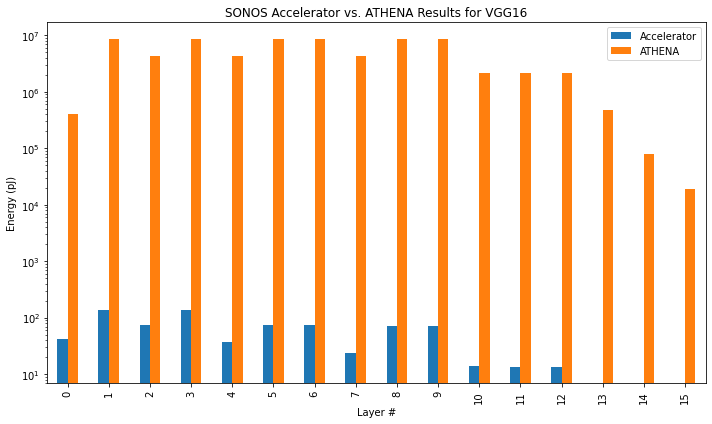

In [3]:
energy_plot = vgg_conv_data.plot(
    kind='bar', figsize=(10,6), 
    title='SONOS Accelerator vs. ATHENA Results for VGG16',
    legend=False, logy=True, xlabel='Layer #', ylabel='Energy (pJ)'
)
energy_plot.legend(['Accelerator', 'ATHENA'])
plt.tight_layout()
plt.show()

#### Import the detailed data recorded by the athena cli

In [5]:
# path to detailed summaries reported by timeloop for each layer
path_to_detailed_sums = Path('./vgg_athena_detailed.pkl')

with open(path_to_detailed_sums, 'rb') as data_file:
    vgg_athena_data = pickle.load(data_file)

In [7]:
vgg_athena_data.keys()

dict_keys(['vgg_layer9', 'vgg_layer5', 'vgg_layer16', 'vgg_layer3', 'vgg_layer10', 'vgg_layer7', 'vgg_layer13', 'vgg_layer1', 'vgg_layer2', 'vgg_layer11', 'vgg_layer12', 'vgg_layer4', 'vgg_layer6', 'vgg_layer15', 'vgg_layer8', 'vgg_layer14'])

In [10]:
vgg_athena_data['vgg_layer9'].keys()

dict_keys(['MAC', 'ALU_OUT', 'scratchpad', 'MVMin', 'dummy_buffer', 'shared_glb', 'DRAM'])

In [16]:
vgg_athena_data['vgg_layer9']['MAC']

{'energy': 8693829850890.239, 'utilization': 0.13073929961089495}

In [15]:
vgg_athena_data['vgg_layer9']['ALU_OUT']

{'energy': 0.0,
 'storage_access_energy': 0.0,
 'read_energy': 0.0,
 'spatial_add_energy': 0.0,
 'temporal_add_energy': 0.0,
 'addr_generation_energy': 0.0,
 'network_energy': 0.0,
 'energy_per_access_per_instance': array([nan, nan, nan]),
 'reads_per_instances': array([0, 0, 0]),
 'updates_per_instances': array([0, 0, 0]),
 'fills_per_instances': array([0, 0, 0]),
 'accesses_per_instances': array([0, 0, 0]),
 'instances': array([86016, 86016, 86016]),
 'utilization': 0.0,
 'multicast': array([1, 1, 1]),
 'dist_multicast': array([0, 0, 0]),
 'num_hops': array([0.5, 0.5, 0.5]),
 'ingresses': array([21504, 21504, 21504]),
 'energy_per_hop_per_instance': array([0., 0., 0.])}

In [17]:
vgg_athena_data['vgg_layer9']['DRAM']

{'energy': 216530944.0,
 'storage_access_energy': 216530944.0,
 'read_energy': 165150720.0,
 'spatial_add_energy': 0.0,
 'temporal_add_energy': 0.0,
 'addr_generation_energy': 0.0,
 'network_energy': 0.0,
 'energy_per_access_per_instance': array([  0., 128., 128.]),
 'reads_per_instances': array([      0, 1290240,       0]),
 'updates_per_instances': array([     0,      0, 401408]),
 'fills_per_instances': array([0, 0, 0]),
 'accesses_per_instances': array([      0, 1290240,  401408]),
 'instances': array([0, 1, 1]),
 'utilization': 1.0,
 'multicast': array([0, 4, 6]),
 'dist_multicast': array([0, 0, 0]),
 'num_hops': array([ 0.        , 25.42296279, 32.21350894]),
 'ingresses': array([      0, 1290240,  401408]),
 'energy_per_hop_per_instance': array([0., 0., 0.])}